In [1]:
from monk import *
from torch import optim
from torch.optim import lr_scheduler

# Monk 1

In [2]:
lr = 0.3
momentum = 0.9
decay = 0.00
nesterov = True
epochs = 500

Test Loss: 0.08791361004114151, Accuracy: 0.9166666666666666


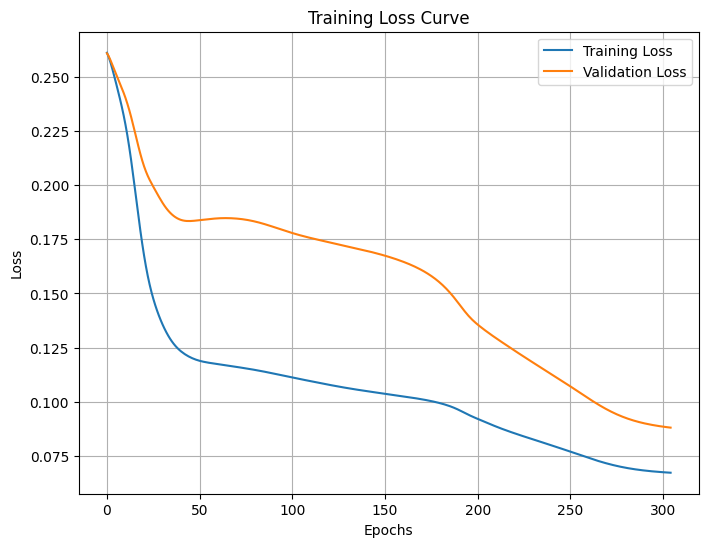

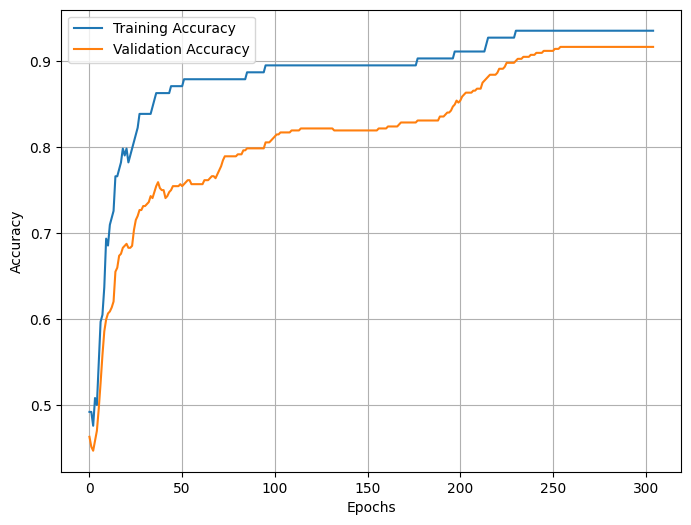

(0.9166666666666666, 0.08791361004114151)

In [3]:
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None)

# Monk 2

In [4]:
lr = 0.35
momentum = 0.75
decay = 0.00
nesterov = False
epochs = 500

Epoch 500/500 - Train Loss: 0.005230599083006382, Accuracy: 1.0
Test Loss: 0.005908366292715073, Accuracy: 1.0


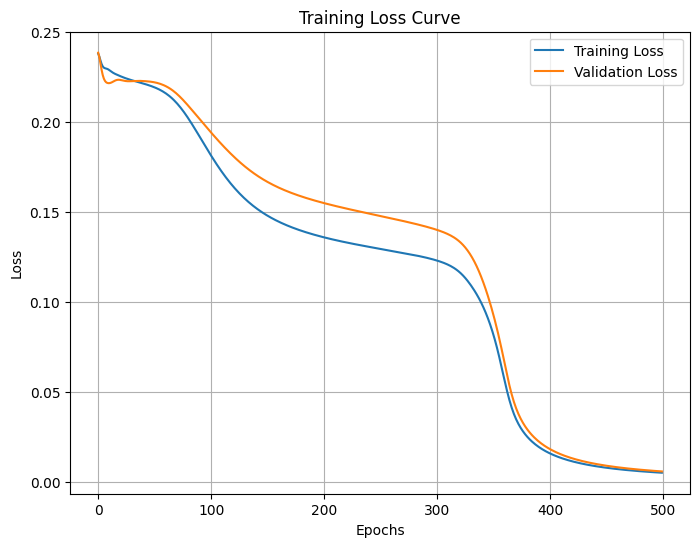

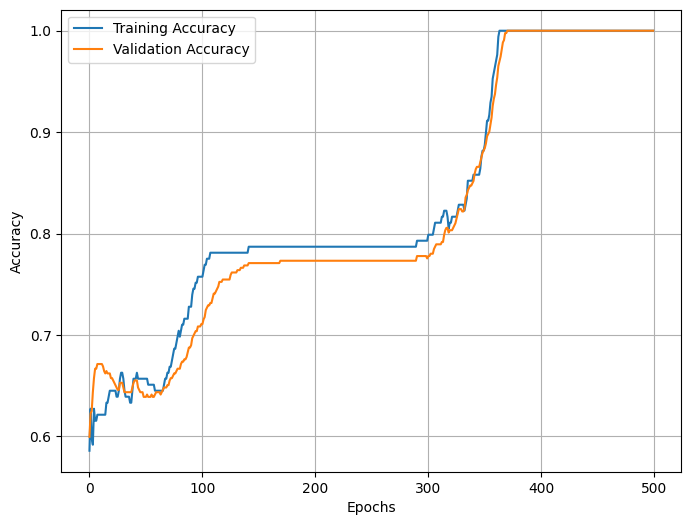

(1.0, 0.005908366292715073)

In [5]:
model = SimpleNN(17, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None, eps=0.00025)

# Monk3

In [6]:
lr = 0.5
momentum = 0.
decay = 0.0
nesterov = False
dampening = 0
epochs = 300

Epoch 300/300 - Train Loss: 0.04691365361213684, Accuracy: 0.9508196721311475
Test Loss: 0.04425095021724701, Accuracy: 0.9560185185185185


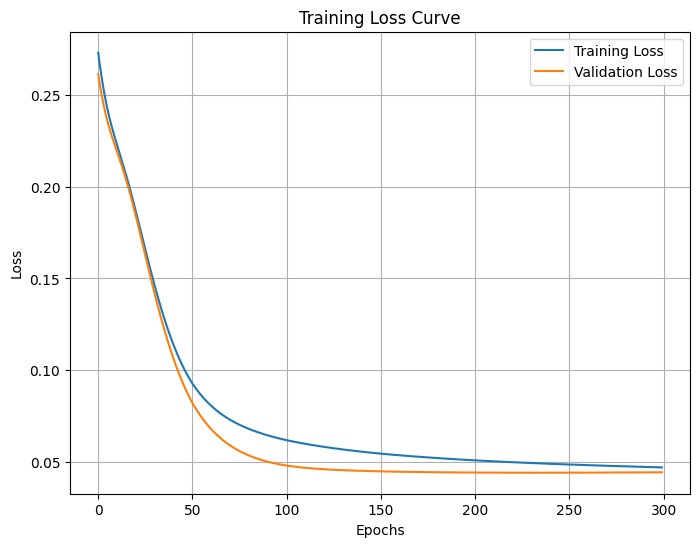

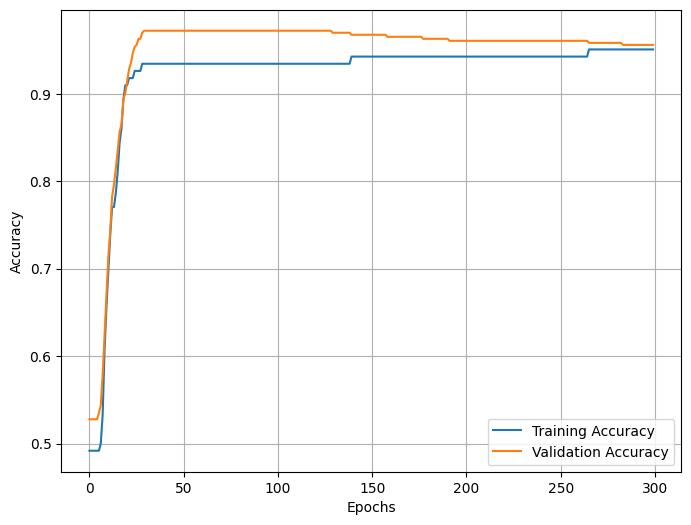

(0.9560185185185185, 0.04425095021724701)

In [7]:
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov,
                      dampening=dampening)
lrs = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.95)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=lrs, eps=0)

# Keras

# Grid search

In [24]:
# Define hyperparameters grid
learning_rates = [0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005]
momentum_values = [0.9, 0.85, 0.8, 0.75, 0.0]
weight_decay_values = [0.0, 0.001, 0.0001, 0.00001]
nesterov_values = [True, False]
epochs = 300


In [9]:
import keras as k

In [10]:
def keras_model():
    return k.models.Sequential(layers=[
        k.layers.InputLayer(input_shape=(17,)),
        k.layers.Dense(2, activation='tanh'),
        k.layers.Dense(1, activation='sigmoid')
    ])


In [11]:
monk1_train_x, monk1_train_y, monk1_test_x, monk1_test_y = label_split(load_dataset("monks-1"))
monk2_train_x, monk2_train_y, monk2_test_x, monk2_test_y = label_split(load_dataset("monks-2"))
monk3_train_x, monk3_train_y, monk3_test_x, monk3_test_y = label_split(load_dataset("monks-3"))

In [30]:
to_test = "monks-3"
# Create grid search manually
best_score = 0
best_params = None
train_cache = 0

callbacks = [k.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=False)]
monk_train_x, monk_train_y, monk_test_x, monk_test_y = label_split(load_dataset(to_test))

In [12]:

for lr in learning_rates:
    for momentum in momentum_values:
        for decay in weight_decay_values:
            for nesterov in nesterov_values:
                model = keras_model()
                model.compile(optimizer=k.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=nesterov,
                                                         weight_decay=decay),
                              loss=k.losses.mse,
                              metrics=['accuracy'])
                history = model.fit(x=monk_train_x, y=monk_train_y, epochs=300, verbose=0,
                                    validation_data=(monk_test_x, monk_test_y),
                                    callbacks=callbacks)

                if (history.history['val_accuracy'][-1] > best_score) and (
                        history.history['accuracy'][-1] > train_cache):
                    best_score = history.history['val_accuracy'][-1]
                    train_cache = history.history['accuracy'][-1]
                    best_params = (lr, momentum, decay, nesterov)

                print("lr: {}, momentum: {}, decay: {}, nesterov: {}".format(lr, momentum, decay, nesterov))
                print("train accuracy: {}, test accuracy: {}".format(history.history['accuracy'][-1],
                                                                     history.history['val_accuracy'][-1]))
                print("train loss: {}, test loss: {}".format(history.history['loss'][-1],
                                                             history.history['val_loss'][-1]))
                print("-------------------------------------------------------------")

print("Best score: {}".format(best_score))
print("Best params: {}".format(best_params))

Epoch 25: early stopping
lr: 0.3, momentum: 0.9, decay: 0.0, nesterov: True
train accuracy: 0.9508196711540222, test accuracy: 0.9421296119689941
train loss: 0.04124794527888298, test loss: 0.047897305339574814
-------------------------------------------------------------
Epoch 24: early stopping
lr: 0.3, momentum: 0.9, decay: 0.0, nesterov: False
train accuracy: 0.9508196711540222, test accuracy: 0.9537037014961243
train loss: 0.041856709867715836, test loss: 0.043051544576883316
-------------------------------------------------------------
Epoch 25: early stopping
lr: 0.3, momentum: 0.9, decay: 0.001, nesterov: True
train accuracy: 0.9590163826942444, test accuracy: 0.9513888955116272
train loss: 0.04101384058594704, test loss: 0.04425341635942459
-------------------------------------------------------------
Epoch 27: early stopping
lr: 0.3, momentum: 0.9, decay: 0.001, nesterov: False
train accuracy: 0.9426229596138, test accuracy: 0.9537037014961243
train loss: 0.04276527091860771,

Epoch 1/300
4/4 [==============================] - 0s 25ms/step - loss: 0.2497 - accuracy: 0.4918 - val_loss: 0.2448 - val_accuracy: 0.6412
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2417 - accuracy: 0.6475 - val_loss: 0.2313 - val_accuracy: 0.7176
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2264 - accuracy: 0.6721 - val_loss: 0.2091 - val_accuracy: 0.7083
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1969 - accuracy: 0.7459 - val_loss: 0.1765 - val_accuracy: 0.8218
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1623 - accuracy: 0.8443 - val_loss: 0.1308 - val_accuracy: 0.8935
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1183 - accuracy: 0.8934 - val_loss: 0.0863 - val_accuracy: 0.9606
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0821 - accuracy: 0.9262 - val_loss: 0.0567 - val_accuracy: 0.9722
Epoch 8/300
4/4 [=========

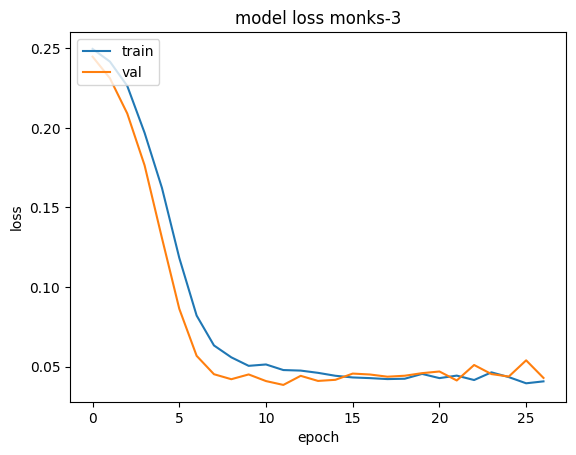

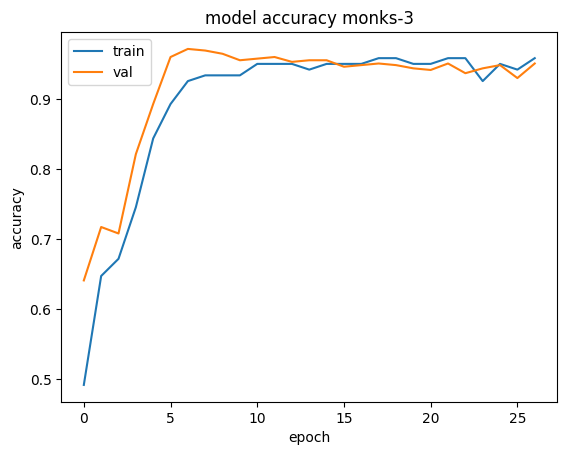

In [13]:
model = keras_model()
lr, momentum, decay, nesterov = best_params

model.compile(optimizer=k.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=nesterov, weight_decay=decay),
              loss=k.losses.mse,
              metrics=['accuracy'])
history = model.fit(x=monk_train_x, y=monk_train_y, epochs=epochs, verbose=1,
                    validation_data=(monk_test_x, monk_test_y),
                    callbacks=callbacks)

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss ' + to_test)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + to_test)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [25]:
def build_model(hp):
    model = keras_model()
    model.compile(
        optimizer=k.optimizers.SGD(learning_rate=hp.Choice('learning_rate', values=learning_rates),
                                   momentum=hp.Choice('momentum', values=momentum_values),
                                   nesterov=hp.Choice('nesterov', values=[True, False]),
                                   weight_decay=hp.Choice('weight_decay', values=weight_decay_values)),
        loss=k.losses.mse,
        metrics=['accuracy'])
    return model

In [26]:
# Create random search with Kerastuner
import keras_tuner

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=25)

tuner.search(monk_train_x, monk_train_y, epochs=50, validation_data=(monk_test_x, monk_test_y))

Trial 25 Complete [00h 00m 02s]
accuracy: 0.9508196711540222

Best accuracy So Far: 0.9672130942344666
Total elapsed time: 00h 00m 50s


In [27]:
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.25, 'momentum': 0.9, 'nesterov': 1, 'weight_decay': 0.0001}

Epoch 1/300
2/2 - 0s - loss: 0.2397 - accuracy: 0.5574 - val_loss: 0.2118 - val_accuracy: 0.6528 - 252ms/epoch - 126ms/step
Epoch 2/300
2/2 - 0s - loss: 0.2196 - accuracy: 0.6393 - val_loss: 0.1841 - val_accuracy: 0.7523 - 18ms/epoch - 9ms/step
Epoch 3/300
2/2 - 0s - loss: 0.1927 - accuracy: 0.7459 - val_loss: 0.1565 - val_accuracy: 0.8472 - 18ms/epoch - 9ms/step
Epoch 4/300
2/2 - 0s - loss: 0.1643 - accuracy: 0.8525 - val_loss: 0.1311 - val_accuracy: 0.9167 - 19ms/epoch - 10ms/step
Epoch 5/300
2/2 - 0s - loss: 0.1405 - accuracy: 0.9016 - val_loss: 0.1121 - val_accuracy: 0.9190 - 19ms/epoch - 10ms/step
Epoch 6/300
2/2 - 0s - loss: 0.1222 - accuracy: 0.9016 - val_loss: 0.0944 - val_accuracy: 0.9514 - 20ms/epoch - 10ms/step
Epoch 7/300
2/2 - 0s - loss: 0.1043 - accuracy: 0.9180 - val_loss: 0.0793 - val_accuracy: 0.9676 - 18ms/epoch - 9ms/step
Epoch 8/300
2/2 - 0s - loss: 0.0899 - accuracy: 0.9344 - val_loss: 0.0664 - val_accuracy: 0.9722 - 19ms/epoch - 9ms/step
Epoch 9/300
2/2 - 0s - los

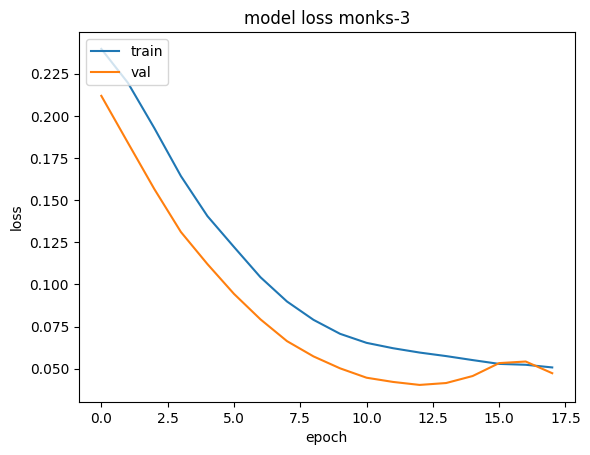

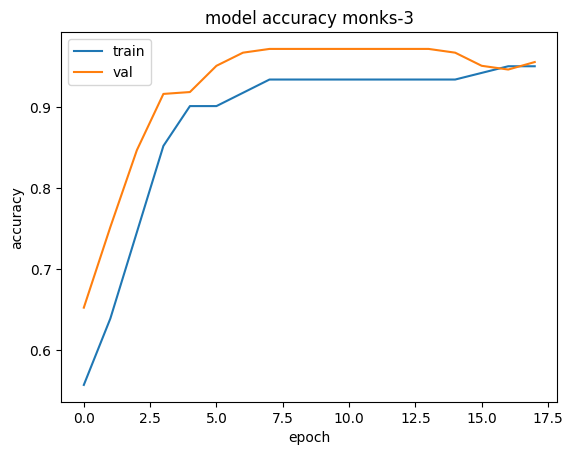

In [31]:
history = keras_model()

history.compile(optimizer=k.optimizers.SGD(learning_rate=0.25, momentum=0.9, nesterov=True, weight_decay=0.0001),
                loss=k.losses.mse,
                metrics=['accuracy'])
history = history.fit(x=monk_train_x, y=monk_train_y, epochs=epochs, verbose=2, batch_size=100,
                      validation_data=(monk_test_x, monk_test_y),
                      callbacks=callbacks)
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss ' + to_test)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ' + to_test)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()